## 0) Loading Data

In [6]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)

data = pd.read_csv("winequality-red.csv", sep=";")

X = data.drop("quality", axis=1)
y = data["quality"]

## Exercise 1

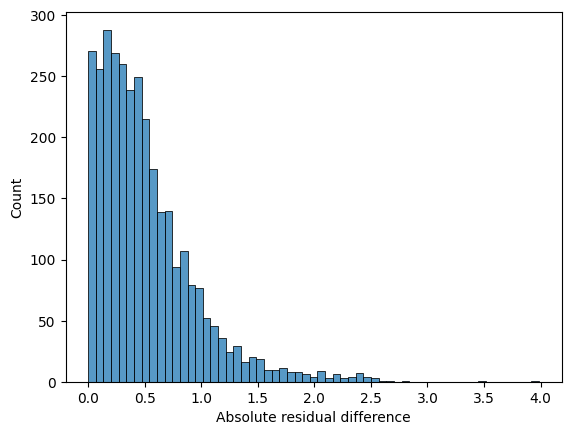

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

regressor_pred = []
residues = []
normal_MAE = [] # this is for exercise 2
normal_RMSE = [] # this is for exercise 3
for i in range(1, 11):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", early_stopping=True, validation_fraction=0.2, random_state=i)
    mlp_regressor.fit(X_train, y_train)
    y_pred = mlp_regressor.predict(X_test)
    regressor_pred.append(y_pred)
    normal_MAE.append(mean_absolute_error(y_test, y_pred))
    normal_RMSE.append(mean_squared_error(y_test, y_pred, squared=False))

normal_MAE = np.mean(normal_MAE)
normal_RMSE = np.mean(normal_RMSE)

for prediction in regressor_pred:
    residue = list(map(lambda x: abs(x) , prediction - y_test))
    residues.append(residue)

residues = np.array(residues).flatten()
sns.histplot(data=residues)
plt.xlabel("Absolute residual difference")
plt.show()

## Exercise 2

In [8]:
def round_bound(x):
    new_x = round(x)
    if new_x < 1:
        return 1
    if new_x > 10:
        return 10
    return new_x

rounded_MAE = []

for prediction in regressor_pred: 
    new_y_pred = list(map(lambda x: round_bound(x), prediction))
    rounded_MAE.append(mean_absolute_error(y_test, new_y_pred))

rounded_MAE = np.mean(rounded_MAE)

print(f"Normal MAE: {normal_MAE}\nRounded and bounded MAE: {rounded_MAE}")

Normal MAE: 0.5097171955009514
Rounded and bounded MAE: 0.43875000000000003


From what we can see, rounding and bounding the estimates had a positive impact in the learnt MLP regressor, since the MAE for the rounded and bounded estimates is lower than the normal one.

## Exercise 3

In [9]:
rmse_20 = []
rmse_50 = []
rmse_100 = []
rmse_200 = []

for i in range(1, 11):
    mlp_regressor_20 = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", max_iter=20, random_state=i)
    mlp_regressor_50 = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", max_iter=50, random_state=i)
    mlp_regressor_100 = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", max_iter=100, random_state=i)
    mlp_regressor_200 = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", max_iter=200, random_state=i)
    mlp_regressor_20.fit(X_train, y_train)
    mlp_regressor_50.fit(X_train, y_train)
    mlp_regressor_100.fit(X_train, y_train)
    mlp_regressor_200.fit(X_train, y_train)
    y20_pred = mlp_regressor_20.predict(X_test)
    y50_pred = mlp_regressor_50.predict(X_test)
    y100_pred = mlp_regressor_100.predict(X_test)
    y200_pred = mlp_regressor_200.predict(X_test)
    rmse_20.append(mean_squared_error(y_test, y20_pred, squared=False))
    rmse_50.append(mean_squared_error(y_test, y50_pred, squared=False))
    rmse_100.append(mean_squared_error(y_test, y100_pred, squared=False))
    rmse_200.append(mean_squared_error(y_test, y200_pred, squared=False))

rmse_20 = np.mean(rmse_20)
rmse_50 = np.mean(rmse_50)
rmse_100 = np.mean(rmse_100)
rmse_200 = np.mean(rmse_200)

print(f"Normal RMSE: {normal_RMSE}\
      \nRMSE with 20 max iterations: {rmse_20}\
      \nRMSE with 50 max iterations: {rmse_50}\
      \nRMSE with 100 max iterations: {rmse_100}\
      \nRMSE with 200 max iterations: {rmse_200}")


Normal RMSE: 0.6706527958221329      
RMSE with 20 max iterations: 1.4039789509925442      
RMSE with 50 max iterations: 0.7996073631460566      
RMSE with 100 max iterations: 0.6940361469112144      
RMSE with 200 max iterations: 0.6554543932216474


From the values above, we can conclude that a well defined number of iterations bellow 200 have a negative impact on RMSE.

## Exercise 4

From the previous exercise, we came to the conclusion that a well defined number of iterations only outperforms early stopping when the number of iterations reaches 200, which is the same as the default early stopping value. One reasons as to why this is the case can relate to the fact that a number of iterations below 200 is too little for the MLP to be efficiently trained, resulting in an undefitted regressor, and thus, more prone to deviations in it's predictions.